In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import networkx as nx

# Function to load the graph from the file
def load_graph(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            source, target = map(int, line.strip().split())
            G.add_edge(source, target)
    return G

# Load the graph from the file
filename = "facebook_combined.txt"
graph = load_graph(filename)

# Print basic information about the graph
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())


Number of nodes: 4039
Number of edges: 88234


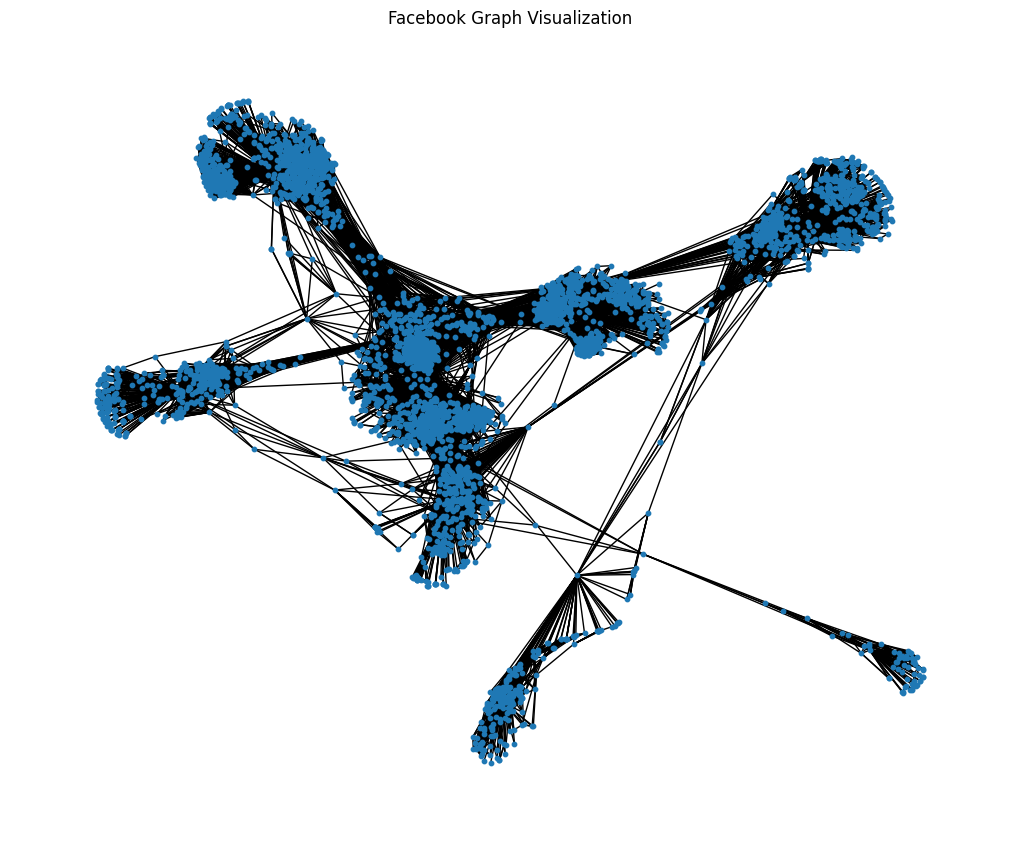

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to load the graph from adjacency list
def load_graph(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            nodes = line.strip().split()
            node = nodes[0]
            neighbors = nodes[1:]
            for neighbor in neighbors:
                G.add_edge(node, neighbor)
    return G

# Load the graph
graph = load_graph("facebook_combined.txt")

# Visualize the graph
plt.figure(figsize=(10, 8))
nx.draw(graph, node_size=10)
plt.title("Facebook Graph Visualization")
plt.show()


<ipython-input-1-80d450a5cb8c>:42: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u, v = random.sample(partition.keys(), 2)


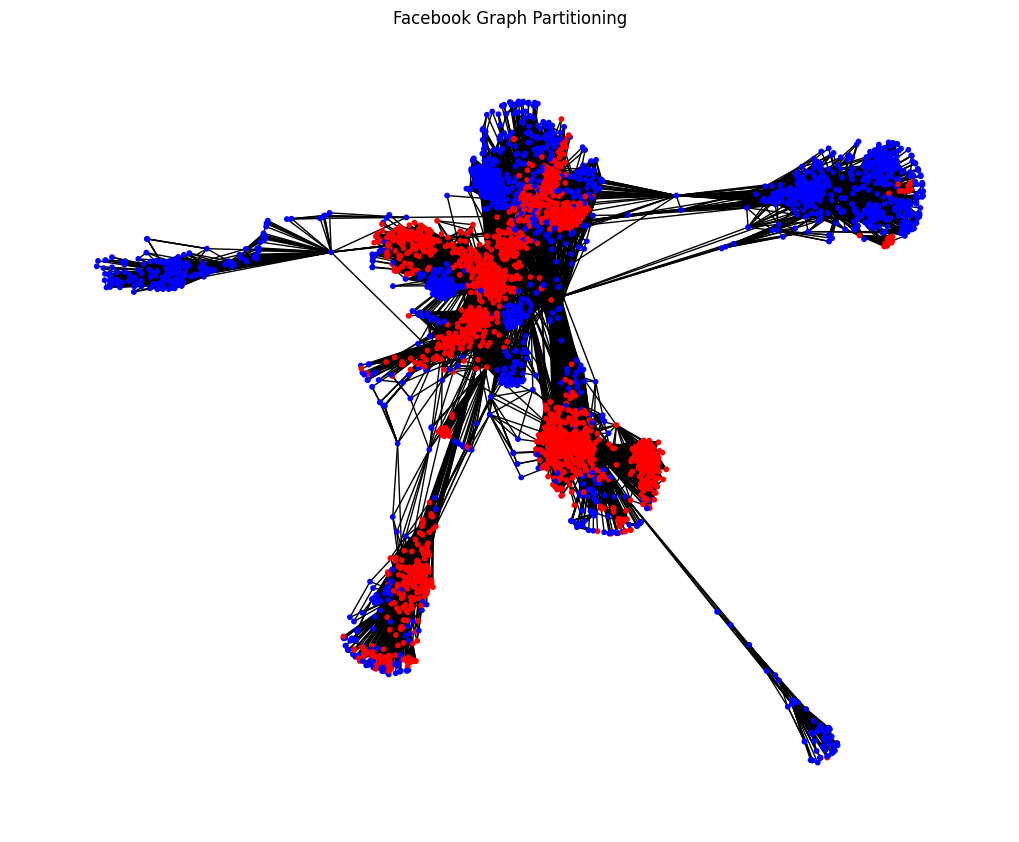

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Function to load the graph from adjacency list
def load_graph(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            nodes = line.strip().split()
            node = nodes[0]
            neighbors = nodes[1:]
            for neighbor in neighbors:
                G.add_edge(node, neighbor)
    return G

# Function to compute an initial random partition
def compute_initial_partition(graph):
    partition = {}
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    half_len = len(nodes) // 2
    partition.update({node: 0 for node in nodes[:half_len]})
    partition.update({node: 1 for node in nodes[half_len:]})
    return partition

# Function to compute the edge cut between partitions
def compute_edge_cut(partition, graph):
    cut = 0
    for node in graph.nodes():
        for neighbor in graph.neighbors(node):
            if partition[node] != partition[neighbor]:
                cut += 1
    return cut // 2  # Divide by 2 since each edge is counted twice

# Function to perform the Kernighan-Lin algorithm
def KL_algorithm(graph, partition, max_iter=100):
    for _ in range(max_iter):
        initial_cut = compute_edge_cut(partition, graph)
        improve = False
        for _ in range(len(graph)//2):  # Perform swaps equal to half the number of nodes
            u, v = random.sample(partition.keys(), 2)
            u_community, v_community = partition[u], partition[v]
            delta_cut = 0
            for neighbor in graph.neighbors(u):
                if partition[neighbor] != u_community:
                    delta_cut -= 1
                else:
                    delta_cut += 1
            for neighbor in graph.neighbors(v):
                if partition[neighbor] != v_community:
                    delta_cut -= 1
                else:
                    delta_cut += 1
            if delta_cut < 0:
                partition[u], partition[v] = v_community, u_community
                improve = True
        if not improve:
            break
    return partition

# Function to save the partitions to a text file
def save_partitions(partition, filename):
    with open(filename, 'w') as file:
        for node, community in partition.items():
            file.write(f"{node} {community}\n")

# Load the graph
graph = load_graph("facebook_combined.txt")

# Compute initial random partition
partition = compute_initial_partition(graph)

# Perform the Kernighan-Lin algorithm
partition = KL_algorithm(graph, partition)

# Save the partitions to a text file
save_partitions(partition, "facebook_partitions.txt")

# Visualize the partitions
pos = nx.spring_layout(graph)
colors = ['r', 'b']
node_colors = [colors[partition[node]] for node in graph.nodes()]
plt.figure(figsize=(10, 8))
nx.draw(graph, pos, node_color=node_colors, with_labels=False, node_size=10)
plt.title("Facebook Graph Partitioning")
plt.show()


In [ ]:
def calculate_efficiency(partition, graph):
    intra_community_edges = 0
    total_possible_intra_community_edges = 0

    for node in graph.nodes():
        for neighbor in graph.neighbors(node):
            if partition[node] == partition[neighbor]:
                intra_community_edges += 1
        total_possible_intra_community_edges += len(list(graph.neighbors(node))) - 1

    efficiency = intra_community_edges / total_possible_intra_community_edges
    return efficiency

# Calculate efficiency of the partition
efficiency = calculate_efficiency(partition, graph)
print("Efficiency of the partition:", efficiency)


Efficiency of the partition: 0.9939279355560839


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

# Function to load the graph from the adjacency list
def load_graph(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            nodes = line.strip().split()
            node = nodes[0]
            neighbors = nodes[1:]
            for neighbor in neighbors:
                G.add_edge(node, neighbor)
    return G

# Function to compute an initial random partition
def compute_initial_partition(graph):
    partition = {}
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    half_len = len(nodes) // 2
    partition.update({node: 0 for node in nodes[:half_len]})
    partition.update({node: 1 for node in nodes[half_len:]})
    return partition

# Function to perform the Kernighan-Lin algorithm
def kernighan_lin(graph, partition, max_iter=100):
    for _ in range(max_iter):
        initial_cut = compute_edge_cut(partition, graph)
        improve = False
        for _ in range(len(graph)//2):  # Perform swaps equal to half the number of nodes
            u, v = random.sample(partition.keys(), 2)
            u_community, v_community = partition[u], partition[v]
            delta_cut = 0
            for neighbor in graph.neighbors(u):
                if partition[neighbor] != u_community:
                    delta_cut -= 1
                else:
                    delta_cut += 1
            for neighbor in graph.neighbors(v):
                if partition[neighbor] != v_community:
                    delta_cut -= 1
                else:
                    delta_cut += 1
            if delta_cut < 0:
                partition[u], partition[v] = v_community, u_community
                improve = True
        if not improve:
            break
    return partition

# Function to compute the edge cut between partitions
def compute_edge_cut(partition, graph):
    cut = 0
    for node in graph.nodes():
        for neighbor in graph.neighbors(node):
            if partition[node] != partition[neighbor]:
                cut += 1
    return cut // 2  # Divide by 2 since each edge is counted twice

# Function to measure the execution time of the Kernighan-Lin algorithm
def measure_execution_time(graph):
    start_time = time.time()
    partition = compute_initial_partition(graph)
    final_partition = kernighan_lin(graph, partition)
    end_time = time.time()
    return end_time - start_time

# Load the Facebook graph
graph = load_graph("facebook_combined.txt")

# Define a range of graph sizes
max_nodes = graph.number_of_nodes()
graph_sizes = list(range(100, max_nodes + 1, 100))

# Measure the execution time for each graph size
execution_times = []
for size in graph_sizes:
    subgraph = graph.subgraph(list(graph.nodes())[:size])
    execution_time = measure_execution_time(subgraph)
    execution_times.append(execution_time)

# Plot the time complexity graph
plt.plot(graph_sizes, execution_times, marker='o')
plt.xlabel('Graph Size (Number of Nodes)')
plt.ylabel('Execution Time (Seconds)')
plt.title('Time Complexity of Kernighan-Lin Algorithm')
plt.grid(True)
plt.show()


<ipython-input-4-ce3a92c3f46b>:34: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u, v = random.sample(partition.keys(), 2)


KeyboardInterrupt: 